In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the iris dataset
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
print (iris.shape) #obtaining the shape

(150, 6)


In [3]:
print (iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualising using Sepal length and Sepal width

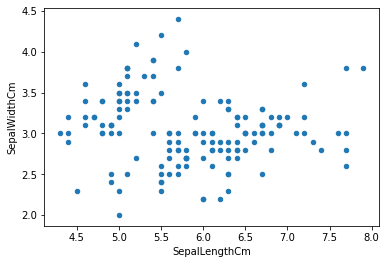

In [6]:
iris.plot(kind='scatter', x = 'SepalLengthCm', y = 'SepalWidthCm')
plt.show()
#by just applying scatter plot we can't tell the particular species

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


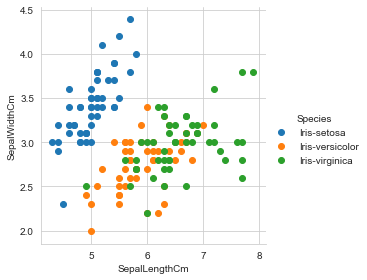

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='Species', size=4)\
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm' )\
    .add_legend();
plt.show()

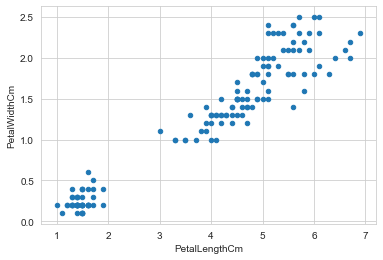

In [8]:
iris.plot(kind='scatter', x = 'PetalLengthCm', y = 'PetalWidthCm')
plt.show()

#####  Here we can see that Setosa is differed from versicolor and verginica

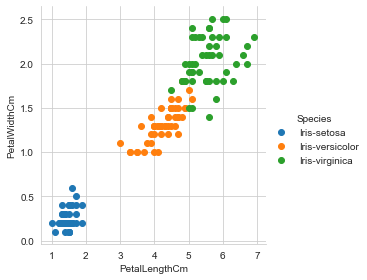

In [9]:
#Here we visaulise using different colors for better understanding
sns.set_style('whitegrid')
sns.FacetGrid(iris, hue='Species', size=4)\
    .map(plt.scatter, 'PetalLengthCm','PetalWidthCm' )\
    .add_legend();
plt.show()

#### ***From this we can tell that Setosa has been seprated but verginica and versocolor are not yet***

In [10]:
iris = iris.drop("Id", axis=1) #We are dropping ID Coloumn since it has no use in obtaining pair plot

F:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


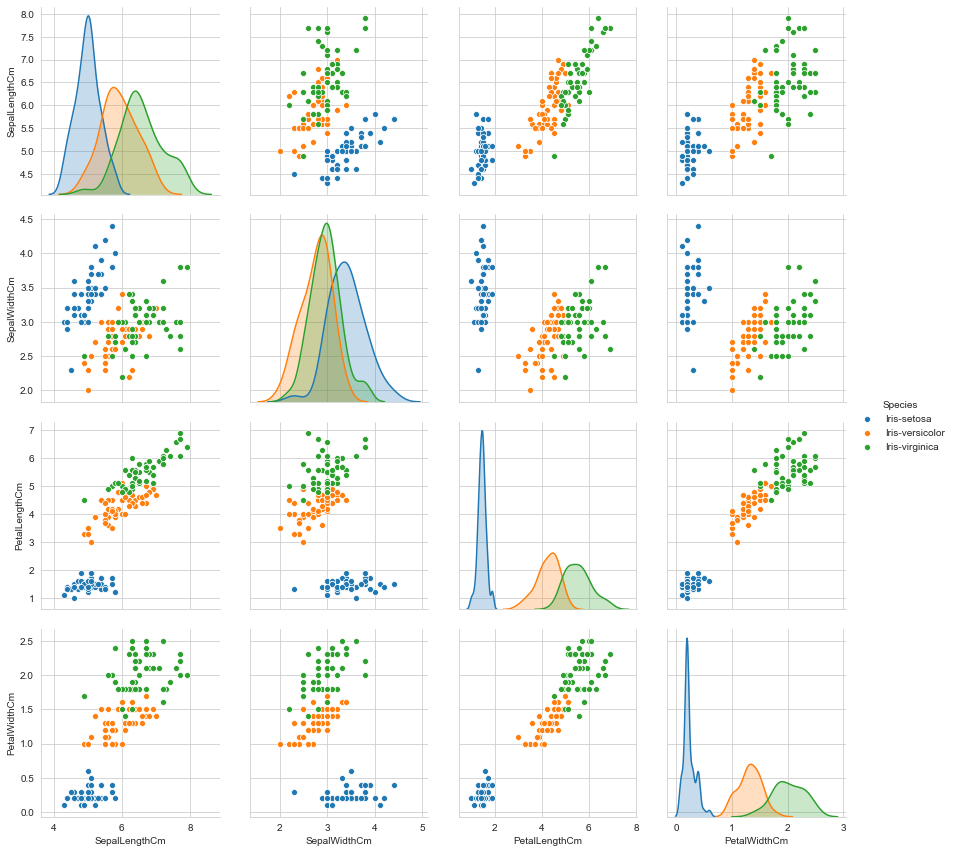

In [11]:
# We can visualise using pair plot 

plt.close();
sns.set_style('whitegrid')
sns.pairplot(iris, hue='Species', size=3)
plt.show()

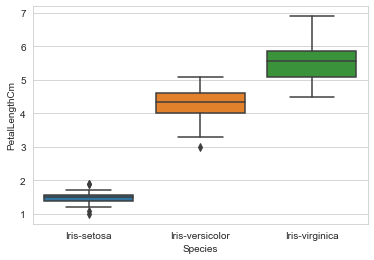

In [12]:
# We can even see the difference using boxplot

sns.boxplot(x='Species',y='PetalLengthCm', data=iris)
plt.show()

In [13]:
x = iris.iloc[:,:-1].values

## K-Means Clustering

In [14]:
from sklearn.cluster import KMeans

In [15]:
km = KMeans()

In [16]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

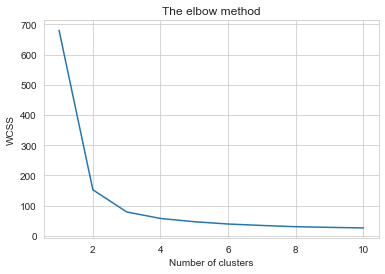

In [17]:
# Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [18]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

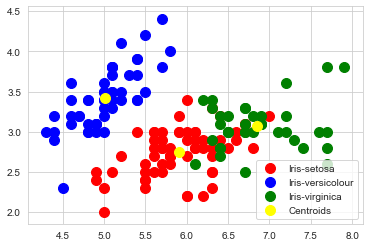

In [19]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Summary :-**
    1. From This we can tell that Setosa has the petalLenght between(0-2), Although its difficult to differntiate Versicolor and Virginica as few point overlap in each cluster.